# Bharat Internship 
**Task 1**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings

In [49]:
data = pd.read_csv("Titanic-Dataset.csv",encoding='latin1')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [52]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
data = data.dropna()

In [57]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [58]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
data['Embarked'].value_counts()

Embarked
S    116
C     65
Q      2
Name: count, dtype: int64

In [60]:
data['Name'].unique

<bound method Series.unique of 1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                             Carlsson, Mr. Frans Olof
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 183, dtype: object>

In [61]:
data['Name'].value_counts()

Name
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     1
Appleton, Mrs. Edward Dale (Charlotte Lamson)           1
Silvey, Mrs. William Baird (Alice Munger)               1
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
Ross, Mr. John Hugo                                     1
                                                       ..
Ball, Mrs. (Ada E Hall)                                 1
Hippach, Miss. Jean Gertrude                            1
Partner, Mr. Austen                                     1
Graham, Mr. George Edward                               1
Behr, Mr. Karl Howell                                   1
Name: count, Length: 183, dtype: int64

In [62]:
data['PassengerId'].unique

<bound method Series.unique of 1        2
3        4
6        7
10      11
11      12
      ... 
871    872
872    873
879    880
887    888
889    890
Name: PassengerId, Length: 183, dtype: int64>

In [63]:
data['PassengerId'].value_counts()

PassengerId
2      1
572    1
578    1
582    1
584    1
      ..
328    1
330    1
332    1
333    1
890    1
Name: count, Length: 183, dtype: int64

In [64]:
data['Survived'].unique

<bound method Series.unique of 1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64>

In [65]:
data['Pclass'].unique

<bound method Series.unique of 1      1
3      1
6      1
10     3
11     1
      ..
871    1
872    1
879    1
887    1
889    1
Name: Pclass, Length: 183, dtype: int64>

In [66]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [67]:
round(data.isnull().sum()*100/len(data),2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [68]:
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical variables: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [69]:
# Count the number of categorical and numerical variables
categorical_count = data.select_dtypes(include='object').shape[1]
numerical_count = data.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 5
Number of numerical variables: 7


In [70]:
data.duplicated().sum()

0

In [71]:
data['Name'].unique

<bound method Series.unique of 1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                             Carlsson, Mr. Frans Olof
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 183, dtype: object>

In [72]:
# List of categorical columns to be one-hot encoded
categorical_columns = ['Name', 'Sex', 'Ticket']

# One-hot encoding the specified categorical columns
data_one_hot_encoded = pd.get_dummies(data, columns=categorical_columns)

print(data_one_hot_encoded.head())

    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare Cabin Embarked  \
1             2         1       1  38.0      1      0  71.2833   C85        C   
3             4         1       1  35.0      1      0  53.1000  C123        S   
6             7         0       1  54.0      0      0  51.8625   E46        S   
10           11         1       3   4.0      1      1  16.7000    G6        S   
11           12         1       1  58.0      0      0  26.5500  C103        S   

    Name_Allen, Miss. Elisabeth Walton  ...  Ticket_PC 17759  Ticket_PC 17760  \
1                                False  ...            False            False   
3                                False  ...            False            False   
6                                False  ...            False            False   
10                               False  ...            False            False   
11                               False  ...            False            False   

    Ticket_PC 17761  Ticke

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_variables  =['Cabin','Embarked']

One_Hot_Encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',One_Hot_Encoder,categorical_variables)
    ],
    remainder='drop'
)

data_encoded = preprocessor.fit_transform(data)

data_encoded_df  =pd.DataFrame(data_encoded,columns=preprocessor.get_feature_names_out())

print(data_encoded_df.head())

   cat__Cabin_A10  cat__Cabin_A16  cat__Cabin_A20  cat__Cabin_A23  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   cat__Cabin_A24  cat__Cabin_A26  cat__Cabin_A31  cat__Cabin_A34  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   cat__Cabin_A36  cat__Cabin_A5  ...  cat__Cabin_F G63  cat__Cabin_F G73  \
0             0.0            0.0  ...               0.0               0.0   
1             0.

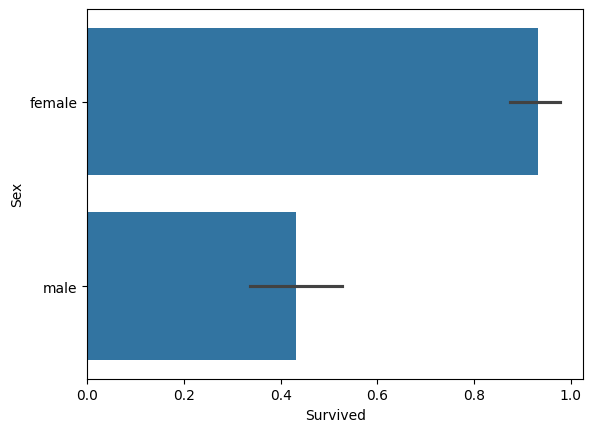

In [74]:
df = data
sns.barplot(x = 'Survived',y = 'Sex',data = df)
plt.show()

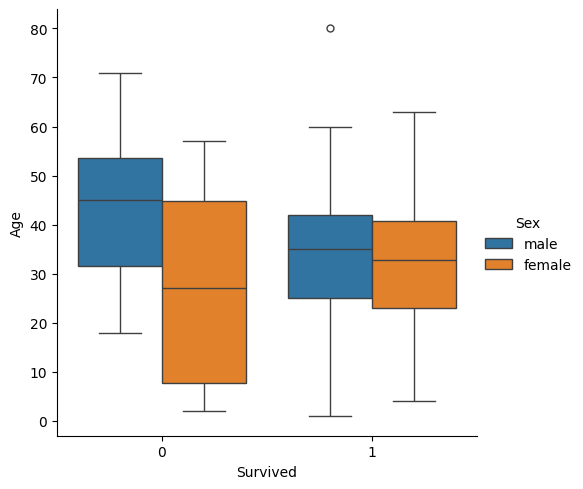

In [75]:
sns.catplot(x="Survived", y="Age", hue="Sex",kind="box", data=data)

In [76]:
data.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            4
Parch            4
Age             63
Fare            93
Ticket         127
Cabin          133
PassengerId    183
Name           183
dtype: int64

In [77]:
# Handle missing values in the 'Age' column by imputing the mean age
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23100\3307068528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].fillna(mean_age, inplace=True)


In [78]:
# Handle missing values in the 'Embarked' column by imputing the most frequent value
most_frequent_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(most_frequent_embarked, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23100\3107014790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'].fillna(most_frequent_embarked, inplace=True)


In [79]:
data.drop('Cabin', axis=1, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23100\3809989213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Cabin', axis=1, inplace=True)


In [80]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [81]:
data= pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,False,False,True
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,True,False,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True


In [82]:
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [83]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Col": 7, "Major": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
data['Title'] = data['Title'].map(title_mapping)

In [84]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [85]:
print(data.head())

    Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
1          1       1  38.0      1      0  71.2833     False       False   
3          1       1  35.0      1      0  53.1000     False       False   
6          0       1  54.0      0      0  51.8625      True       False   
10         1       3   4.0      1      1  16.7000     False       False   
11         1       1  58.0      0      0  26.5500     False       False   

    Embarked_S  Title  
1        False    3.0  
3         True    3.0  
6         True    1.0  
10        True    2.0  
11        True    2.0  


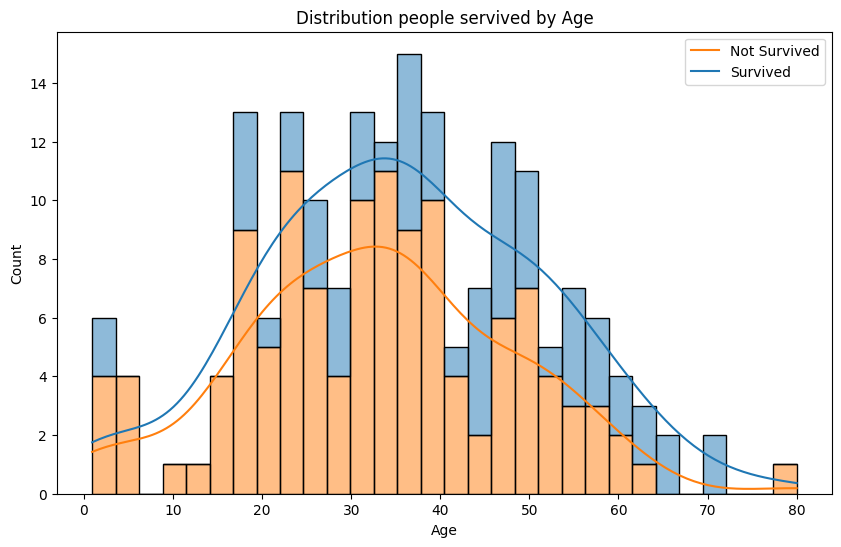

In [86]:
# Ignore FutureWarning related to use_inf_as_na and grouping with a length-1 list-like
warnings.simplefilter(action='ignore', category=FutureWarning)
# Explore the distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True, hue='Survived', multiple='stack')
plt.title('Distribution people servived by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

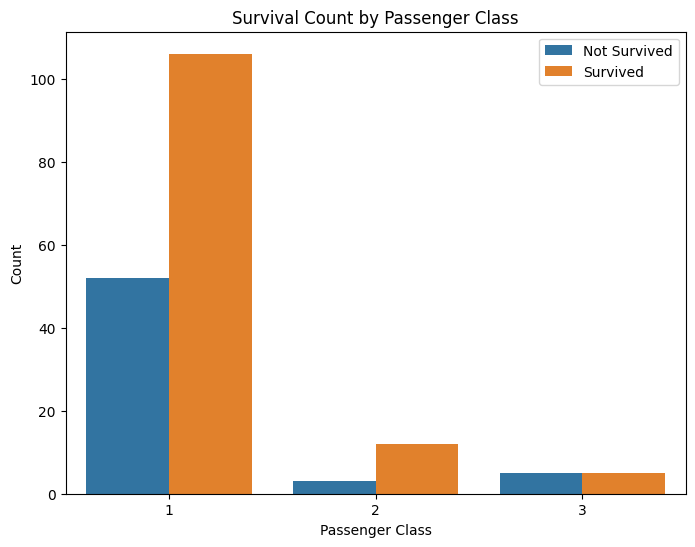

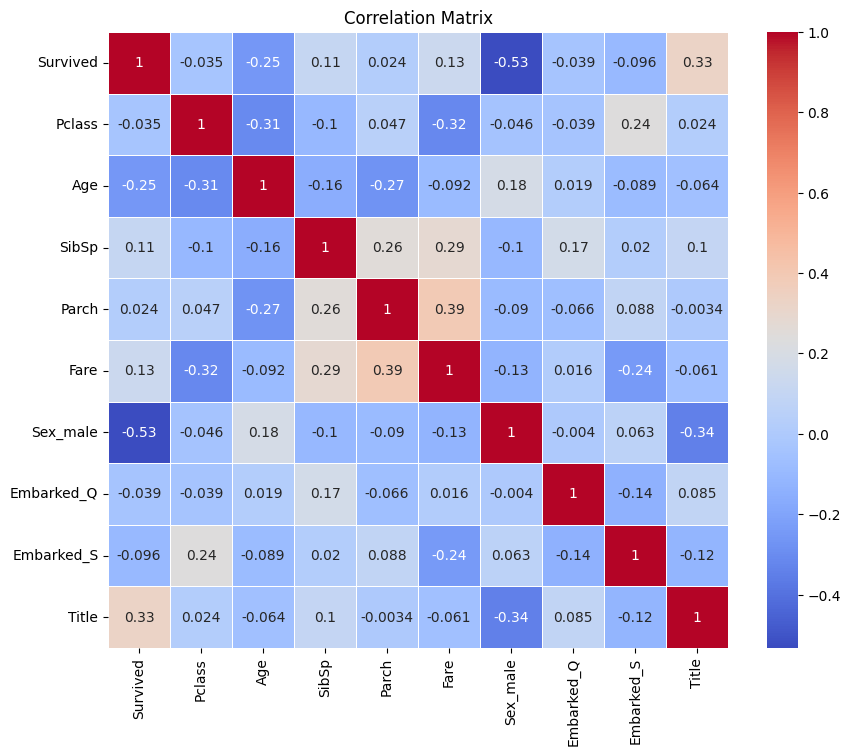

In [87]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Explore correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

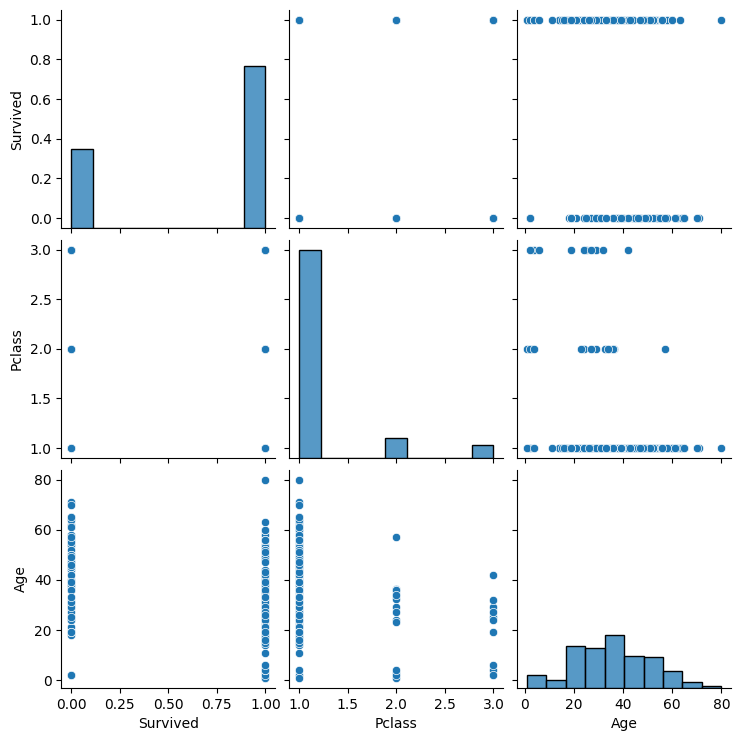

In [88]:
sns.pairplot(data[['Survived','Pclass','Age']])
plt.show()

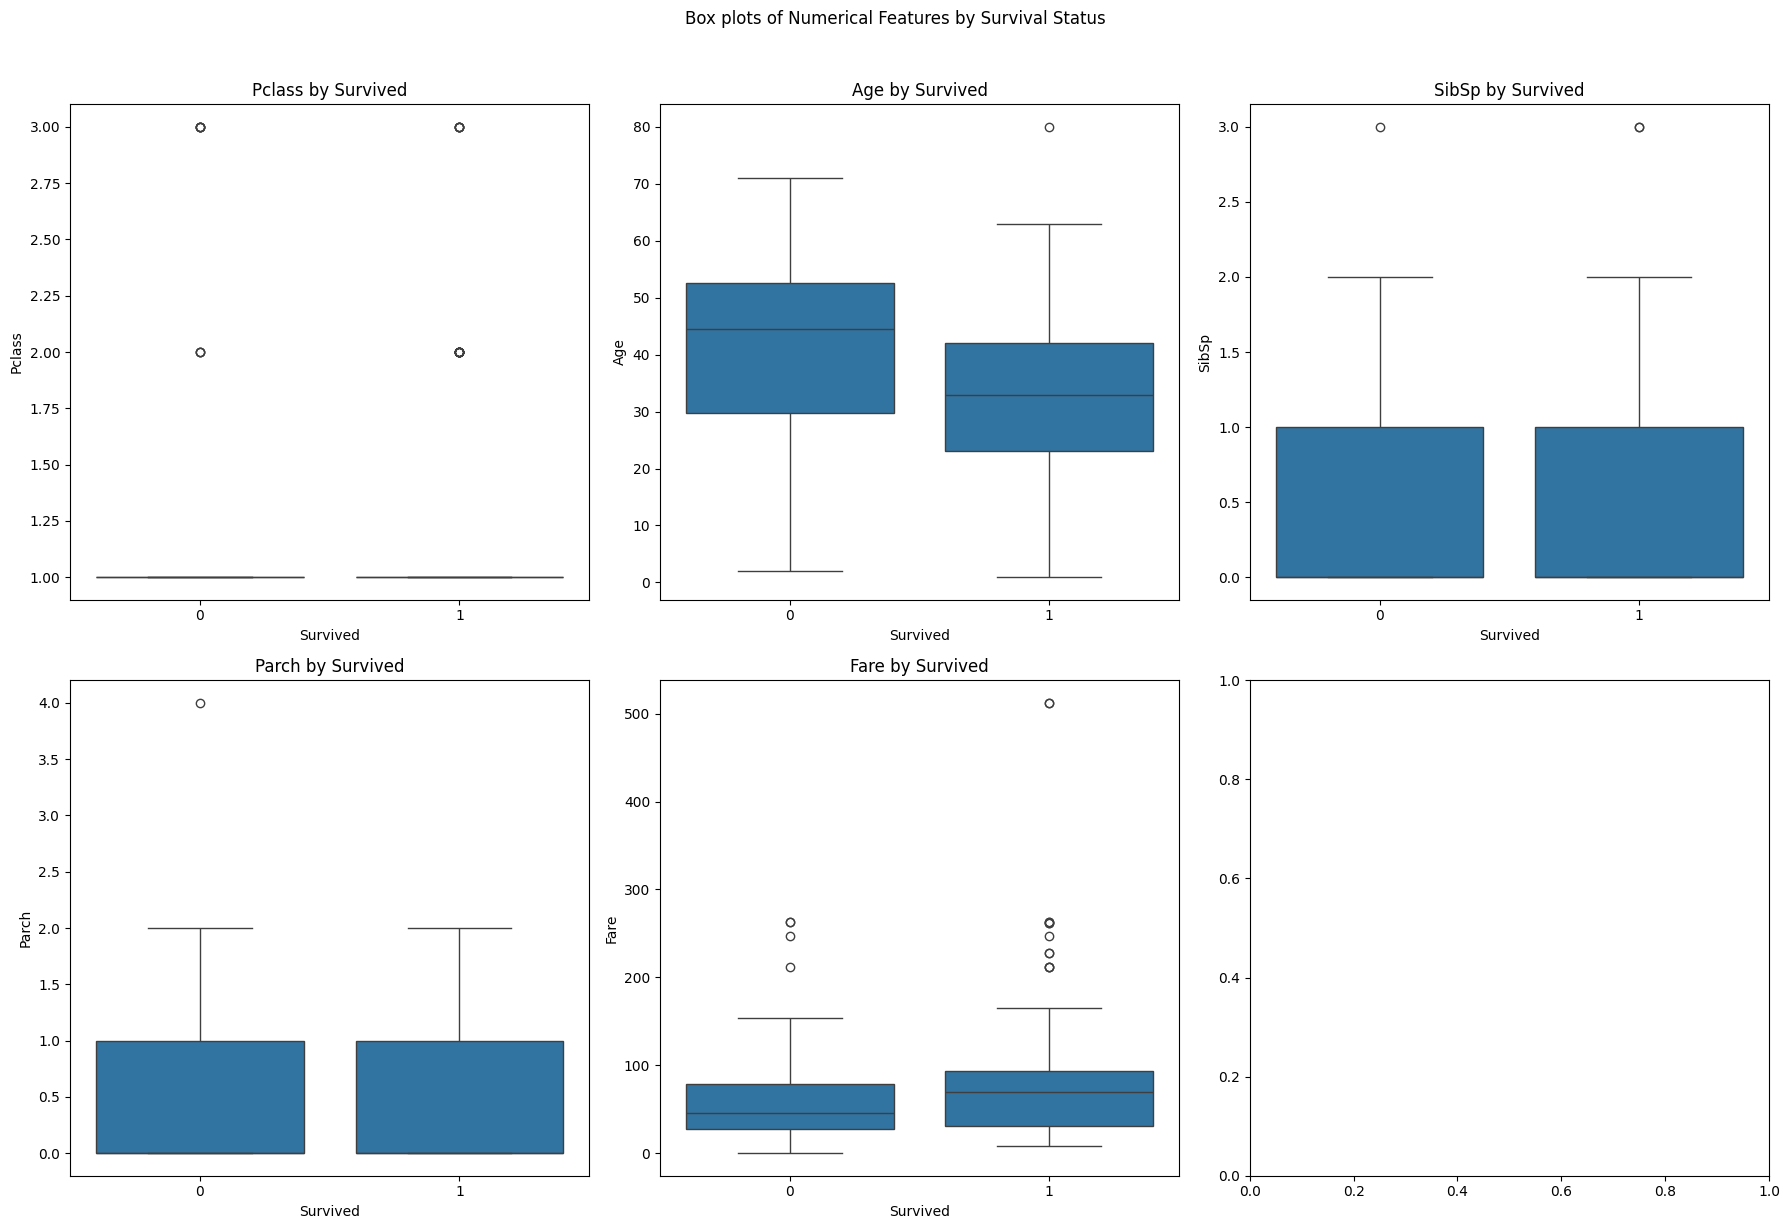

In [89]:
# Box plots to visualize the distribution of numerical features by survival status
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, col in enumerate(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']):
    sns.boxplot(x='Survived', y=col, data=data, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} by Survived')
plt.suptitle('Box plots of Numerical Features by Survival Status', y=1.02)
plt.tight_layout()
plt.show()

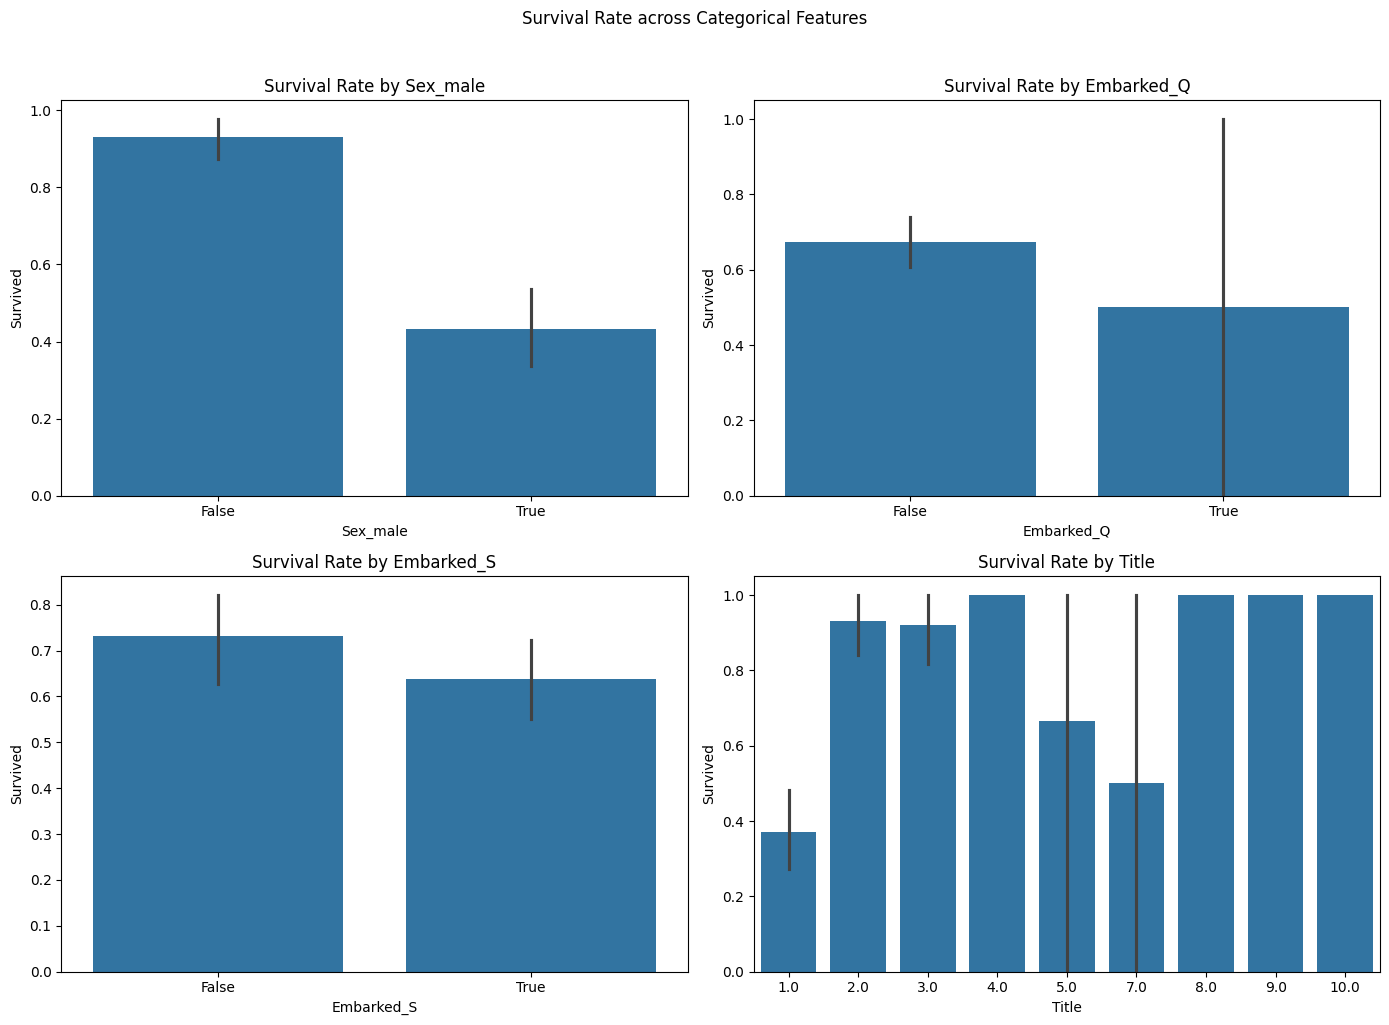

In [90]:
# Bar plots to visualize survival rates across categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(['Sex_male', 'Embarked_Q', 'Embarked_S', 'Title']):
    sns.barplot(x=col, y='Survived', data=data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Survival Rate by {col}')
plt.suptitle('Survival Rate across Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

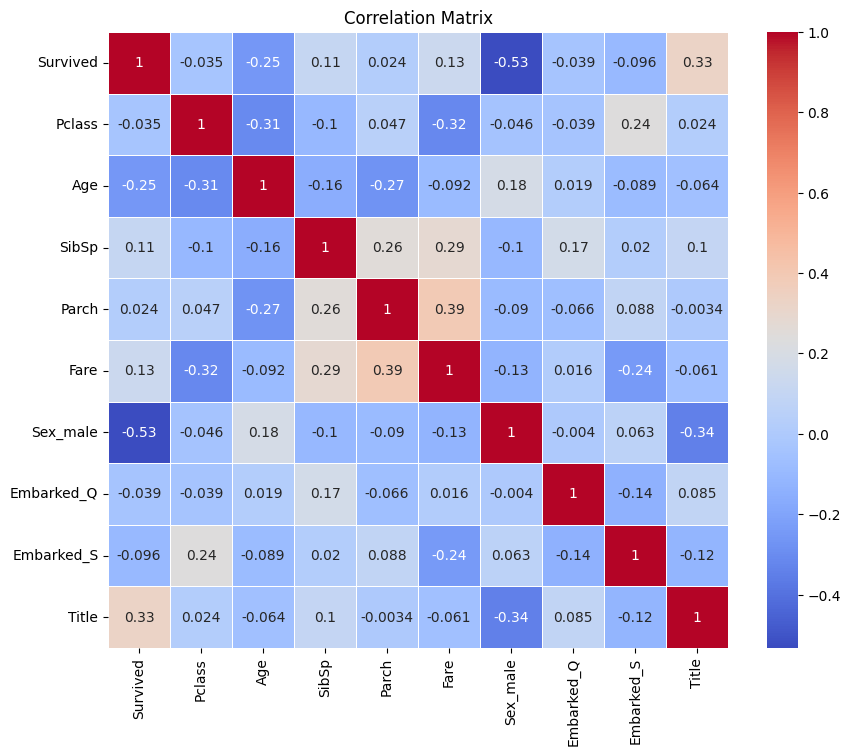

In [91]:
# Correlation matrix heatmap with annotations
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [92]:
# Identify missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Handle missing values: Impute with mean or median
# You can also choose other strategies such as mode or specific value
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Title'].fillna(data['Title'].mode()[0], inplace=True)

# Alternatively, you can drop rows with missing values
# df.dropna(inplace=True)

# Now, proceed with training your models


Missing values in the dataset:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title         1
dtype: int64


In [93]:
# Impute missing value in 'Title' column with mode
mode_title = data['Title'].mode()[0]
data['Title'].fillna(mode_title, inplace=True)

# Alternatively, you can drop the row containing the missing value
# df.dropna(subset=['Title'], inplace=True)


In [94]:
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title         0
dtype: int64


In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

# Load your Titanic dataset into a DataFrame (assuming it's already loaded)

# Separate features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier to estimate feature importance
rf_clf.fit(X_imputed, y)

# Extract feature importance scores
feature_importances = rf_clf.feature_importances_

# Select features with importance scores above a certain threshold
selector = SelectFromModel(rf_clf, threshold=0.05)
selector.fit(X_imputed, y)

# Get the indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features_names = X.columns[selected_features_indices]

# Display selected features
print("Selected Features:")
print(selected_features_names)


Selected Features:
Index(['Age', 'Fare', 'Sex_male', 'Title'], dtype='object')


In [96]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)


In [97]:
# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (146, 4)
Shape of X_test: (37, 4)
Shape of y_train: (146,)
Shape of y_test: (37,)


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Initialize instances of the chosen algorithms with default parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Preprocess features if necessary (e.g., standardization for SVM or KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each model using cross-validation
for name, model in models.items():
    print(f"Training {name}...")

    # Perform grid search for hyperparameter tuning
    if name in ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors']:
        param_grid = {}  # Define hyperparameter grid for each model
        if name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200, 300],
                          'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 5, 10]}
        elif name == 'Gradient Boosting':
            param_grid = {'n_estimators': [100, 200, 300],
                          'learning_rate': [0.01, 0.1, 0.5],
                          'max_depth': [3, 5, 7]}
        elif name == 'Support Vector Machine':
            param_grid = {'C': [0.1, 1, 10],
                          'kernel': ['linear', 'rbf', 'poly']}
        elif name == 'K-Nearest Neighbors':
            param_grid = {'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}
        
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled if name != 'K-Nearest Neighbors' else X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled if name != 'K-Nearest Neighbors' else X_test)
    else:
        model.fit(X_train_scaled if name != 'K-Nearest Neighbors' else X_train, y_train)
        y_pred = model.predict(X_test_scaled if name != 'K-Nearest Neighbors' else X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.2f}")

    # Print classification report and confusion matrix
    print(f"Classification Report of {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix of {name}:")
    print(confusion_matrix(y_test, y_pred))
    print()


Training Logistic Regression...
Accuracy of Logistic Regression: 0.78
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.86      0.78      0.82        23

    accuracy                           0.78        37
   macro avg       0.77      0.78      0.78        37
weighted avg       0.79      0.78      0.79        37

Confusion Matrix of Logistic Regression:
[[11  3]
 [ 5 18]]

Training Decision Tree...
Accuracy of Decision Tree: 0.81
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.81      0.91      0.86        23

    accuracy                           0.81        37
   macro avg       0.81      0.78      0.79        37
weighted avg       0.81      0.81      0.81        37

Confusion Matrix of Decision Tree:
[[ 9  5]
 [ 2 21]]

Training Random 

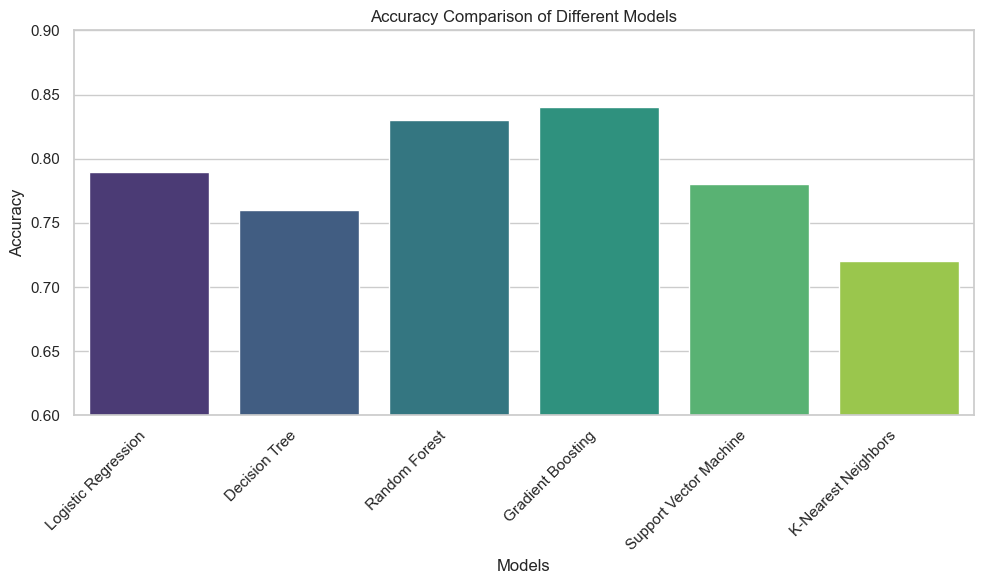

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors']
accuracies = [0.79, 0.76, 0.83, 0.84, 0.78, 0.72]

# Create a bar plot to visualize the accuracies of different models
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.9)  # Set the y-axis limit for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_clf.predict(X_test)

# Evaluate model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting:", accuracy_gb)



Accuracy of Gradient Boosting: 0.7567567567567568


In [101]:
# Classification report
print("Classification Report of Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.79      0.83      0.81        23

    accuracy                           0.76        37
   macro avg       0.74      0.73      0.74        37
weighted avg       0.75      0.76      0.75        37



In [102]:
# Confusion matrix
print("Confusion Matrix of Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))


Confusion Matrix of Gradient Boosting:
[[ 9  5]
 [ 4 19]]


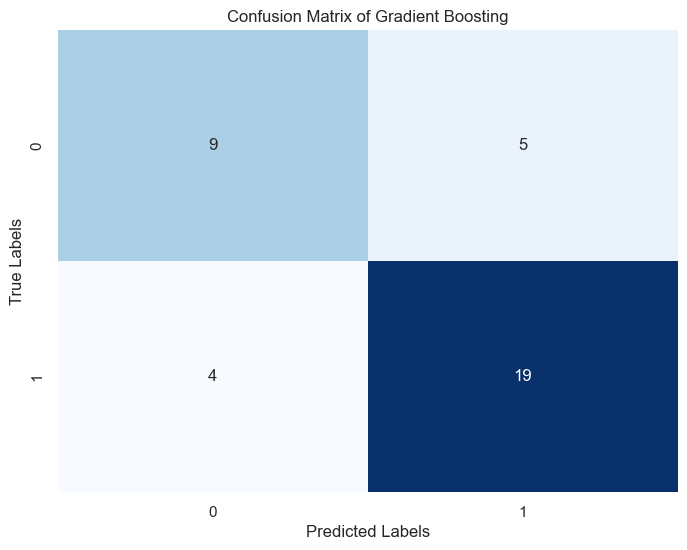

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Gradient Boosting')
plt.show()

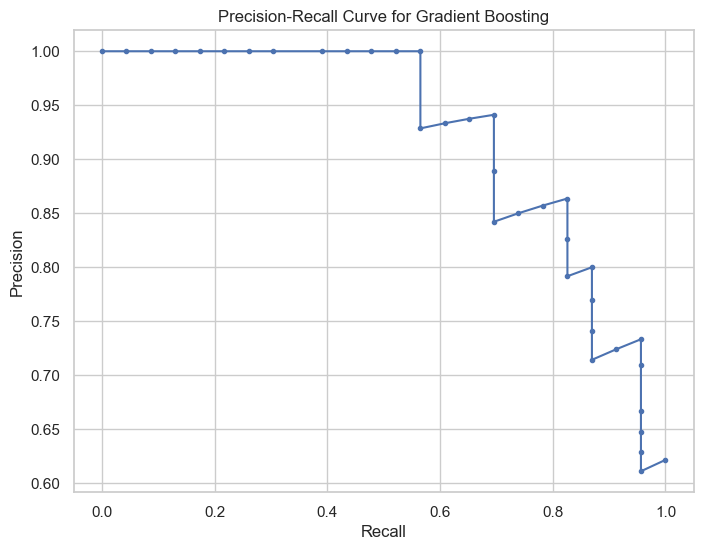

In [104]:
# Plotting precision-recall curve
from sklearn.metrics import precision_recall_curve

precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_gb, precision_gb, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.show()


# Model Evaluation

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

# Predict the labels for the test set using the Gradient Boosting model
y_pred_gb = gradient_boosting_model.predict(X_test)

# Calculate evaluation metrics for the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

# Print the evaluation metrics for the Gradient Boosting model
print("Evaluation metrics for Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1-score: {f1_gb:.2f}")
print(f"ROC-AUC: {roc_auc_gb:.2f}")


Evaluation metrics for Gradient Boosting:
Accuracy: 0.76
Precision: 0.79
Recall: 0.83
F1-score: 0.81
ROC-AUC: 0.73


## Hyperparameter Tuning:

In [106]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Instantiate the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Extract the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)
print("ROC-AUC:", roc_auc_best)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.7567567567567568
Precision: 0.7916666666666666
Recall: 0.8260869565217391
F1-score: 0.8085106382978723
ROC-AUC: 0.7344720496894409


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)

# Step 2: Define and train the initial Gradient Boosting model
initial_gb_model = GradientBoostingClassifier()
initial_gb_model.fit(X_train, y_train)

# Step 3: Evaluate the initial model
initial_predictions = initial_gb_model.predict(X_test)
initial_accuracy = accuracy_score(y_test, initial_predictions)
initial_precision = precision_score(y_test, initial_predictions)
initial_recall = recall_score(y_test, initial_predictions)
initial_f1 = f1_score(y_test, initial_predictions)
initial_roc_auc = roc_auc_score(y_test, initial_predictions)

print("Initial Evaluation metrics for Gradient Boosting:")
print(f"Accuracy: {initial_accuracy}")
print(f"Precision: {initial_precision}")
print(f"Recall: {initial_recall}")
print(f"F1-score: {initial_f1}")
print(f"ROC-AUC: {initial_roc_auc}")

#


Initial Evaluation metrics for Gradient Boosting:
Accuracy: 0.7567567567567568
Precision: 0.7916666666666666
Recall: 0.8260869565217391
F1-score: 0.8085106382978723
ROC-AUC: 0.7344720496894409


In [108]:
#  Step 4: Hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Step 5: Evaluate the tuned Gradient Boosting model
best_predictions = best_gb_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_roc_auc = roc_auc_score(y_test, best_predictions)

print("Evaluation metrics for Gradient Boosting after hyperparameter tuning:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1-score: {best_f1}")
print(f"ROC-AUC: {best_roc_auc}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Evaluation metrics for Gradient Boosting after hyperparameter tuning:
Accuracy: 0.7837837837837838
Precision: 0.8260869565217391
Recall: 0.8260869565217391
F1-score: 0.8260869565217391
ROC-AUC: 0.7701863354037267


In [109]:
Final_model=best_gb_model

## Model Testing :

In [110]:
# Make predictions on the testing set
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Evaluation metrics:
Accuracy: 0.7837837837837838
Precision: 0.8260869565217391
Recall: 0.8260869565217391
F1-score: 0.8260869565217391


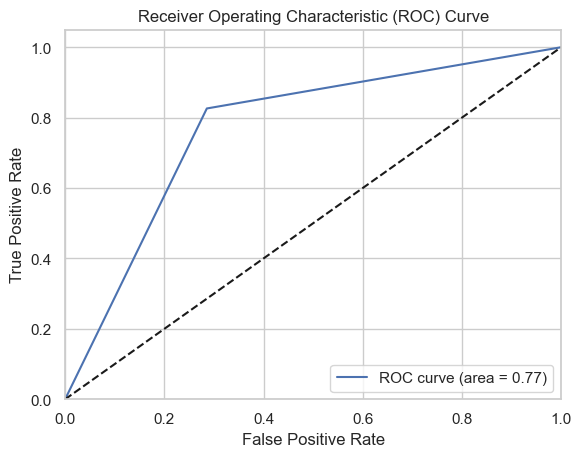

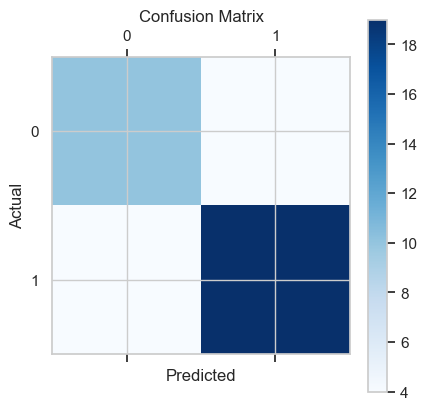

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


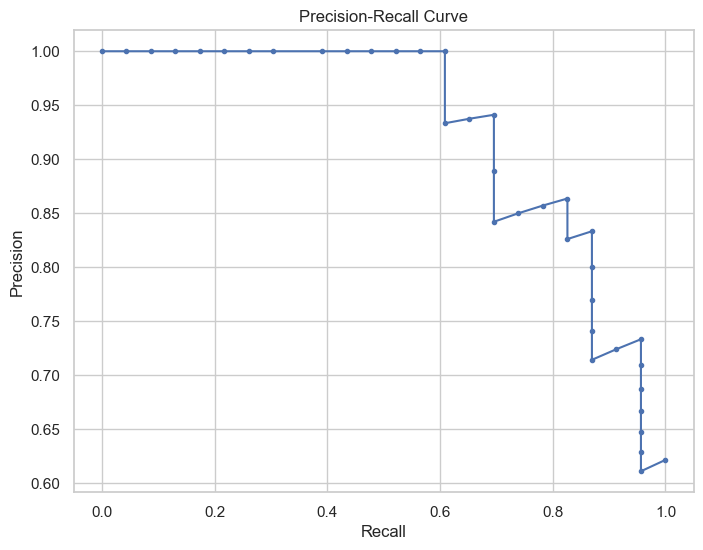

In [112]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming best_gb_model is your trained Gradient Boosting model
y_scores = best_gb_model.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


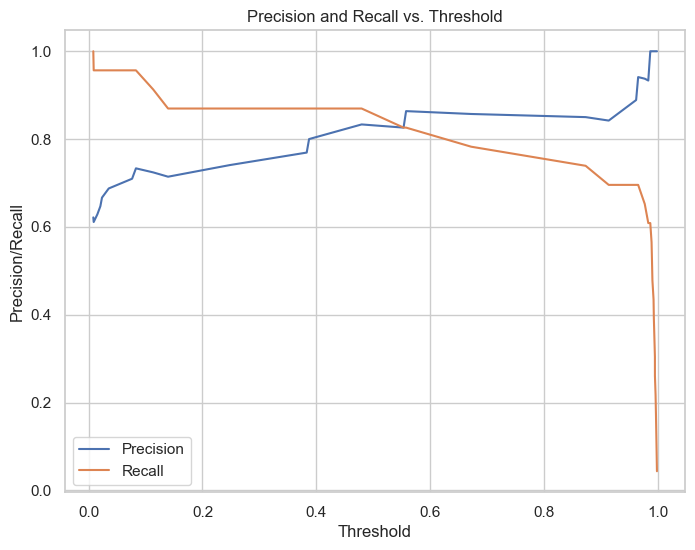

In [113]:
# Precision-Recall vs. Threshold Plot
# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.show()